### In data Analysis we will perform these operations
1. Introduction<br>
2. Read Data<br>
3. Explore Data<br>
    a. Data size<br>
    b. Strtucture of Data<br>
4. Exploratory Data Analysis & Visualization<br>
    a. Check Missing Values<br>
    b. Correlation between missing values and Sales Price<br>
    c. Check numerical varibale<br>
    d. Temporal variables and correlation with Sales Price<br>
    e. Discrete variables and correlation with Sales Price<br>
    f. Continuous variables, skeweness and outliers<br>
    g. Categorial variables and correlation with Sales Price<br>

### Description of dataset

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to ﬁve Boston employment centers
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per $10,000
* PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in $1000s
We can see that the input attributes have a mixture of units.


MEDV is dependent variable our aim will be to predict the MEDV value

In [2]:
# Import libraries to analyze and visualize the data
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
# data cleaning
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(r"C:\Users\Prince\OneDrive\Desktop\Projects\Water quality Prediction\datasets\housing.csv",  delim_whitespace=True, names=names)
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [5]:
# informqation about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# shape of data 
data.shape

(506, 14)

In [7]:
# statistical parameters
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Exploratory Data Analysis & Visualization

#### Check Null values 

In [8]:
# cheak null value in dataset 
data.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

##### Conclusion - There are no null value in data set 

#### Correlation between missing values and dependent features

Since there is no missing values in dataset hence no need to explore the relation between missing values and dependent feature

#### Check numerical varibale

In [10]:
# name of columns in dataset
data.columns
numerical_feature = [feature for feature in data.columns if data[feature].dtype != "o"]
print(numerical_feature)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


#### Temporal variables and correlation with dependent feature 

Given dataset have not any columns of temporarl feature hence no need to explore the relation between the dependent feature and temporaral feature 

#### Discrete variables and correlation with dependent feature 


In [11]:
# cheak discrete feature 
discrete_feature = [feature for feature in data.columns if data[feature].nunique() < 5 ]
print(discrete_feature)

['CHAS']


A feature name Chas is discrete in nature since it has only two unique value 

<BarContainer object of 2 artists>

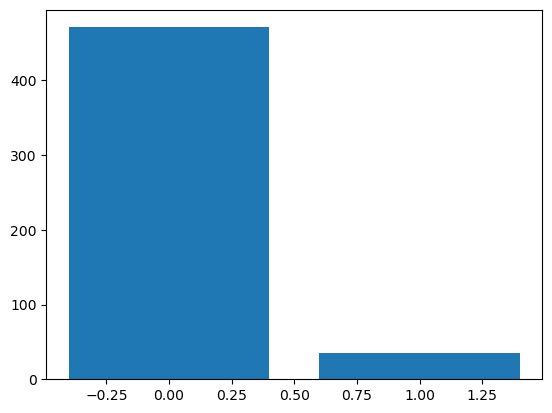

In [21]:
plt.bar([0,1 ],data["CHAS"].value_counts())

#### Continuous variables, skeweness and outliers

In [26]:
continuous_feature  = [feature for feature in data.columns if data[feature].nunique() > 5] 
print(continuous_feature)

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


skewness of CRIM is 5.223148798243851
skewness of ZN is 2.2256663227354307


c:\Users\Prince\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Prince\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness of INDUS is 0.29502156787351164
skewness of CHAS is 3.405904172058746
skewness of NOX is 0.7293079225348787


c:\Users\Prince\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Prince\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Prince\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

skewness of RM is 0.40361213328874385
skewness of AGE is -0.5989626398812962
skewness of DIS is 1.0117805793009007
skewness of RAD is 1.0048146482182057
skewness of TAX is 0.669955941795016
skewness of PTRATIO is -0.8023249268537809


c:\Users\Prince\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Prince\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Prince\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

skewness of B is -2.8903737121414492


c:\Users\Prince\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness of LSTAT is 0.9064600935915367
skewness of MEDV is 1.1080984082549072


c:\Users\Prince\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Prince\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


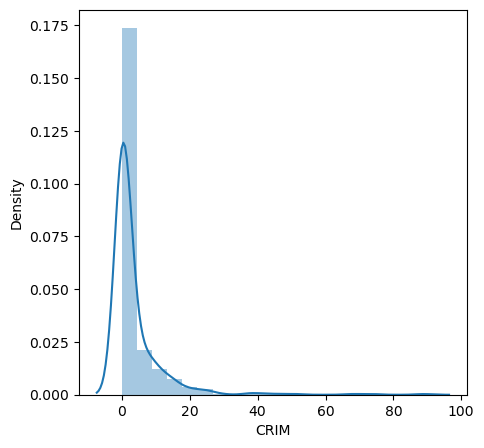

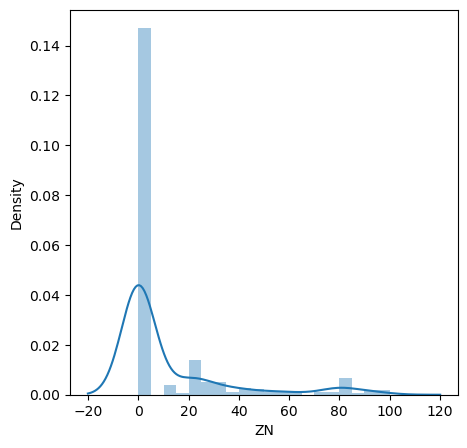

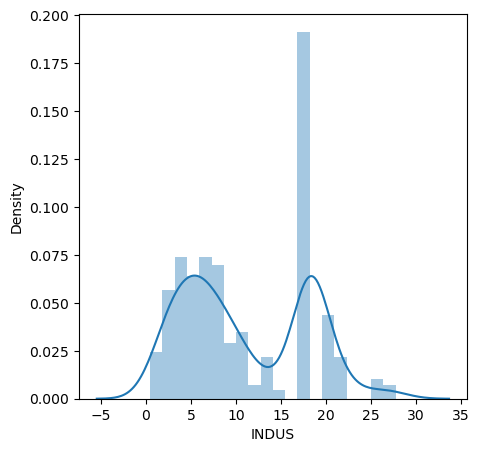

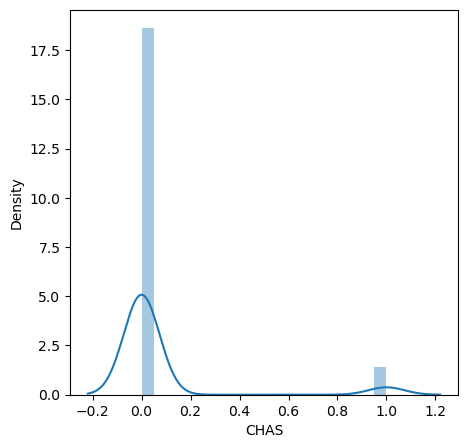

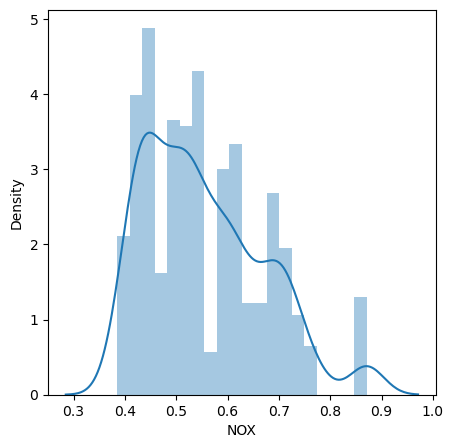

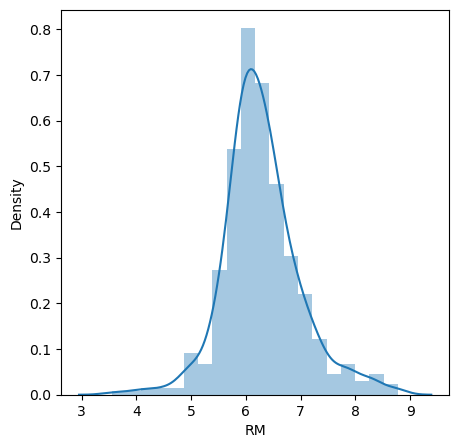

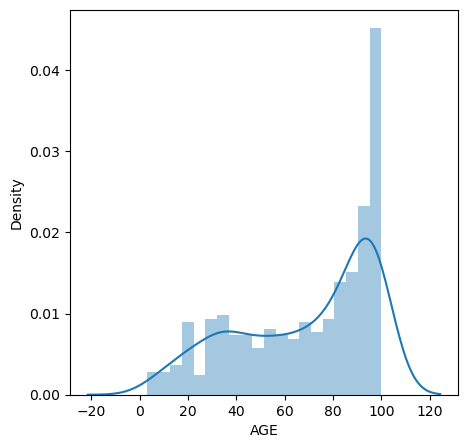

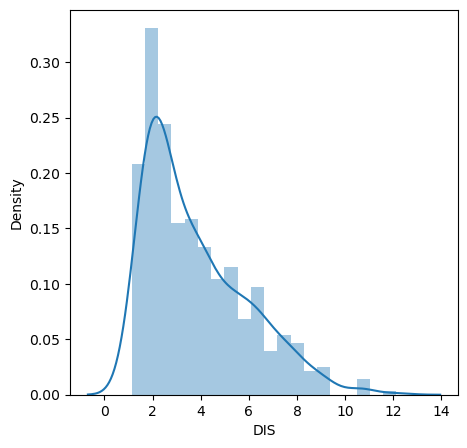

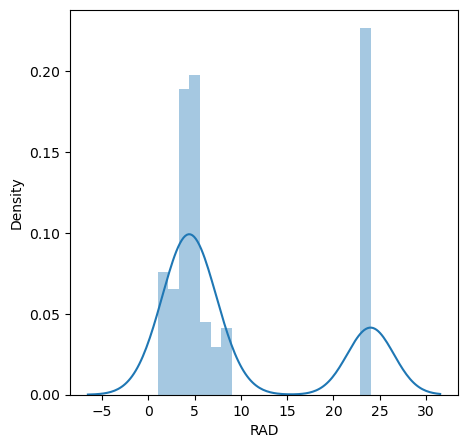

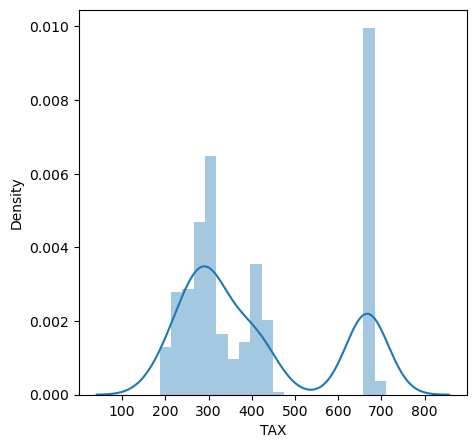

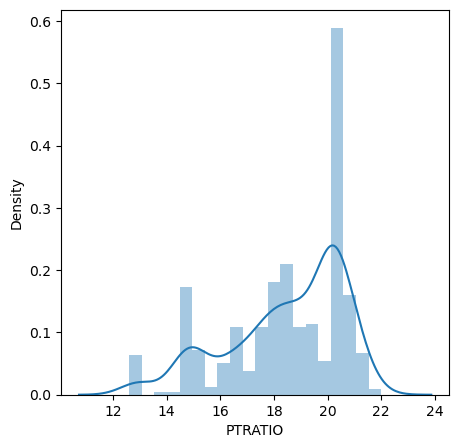

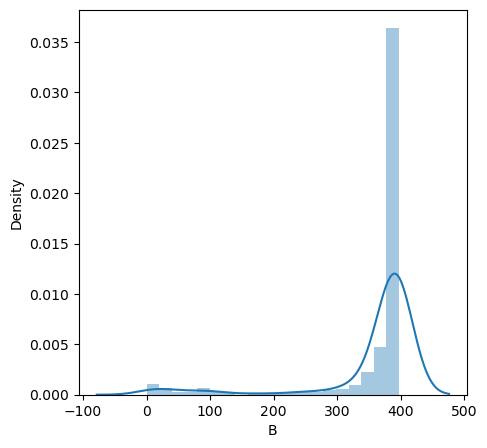

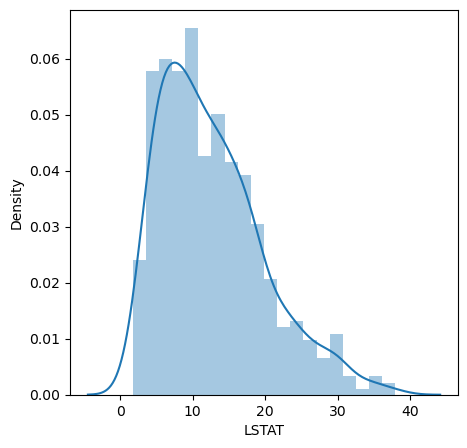

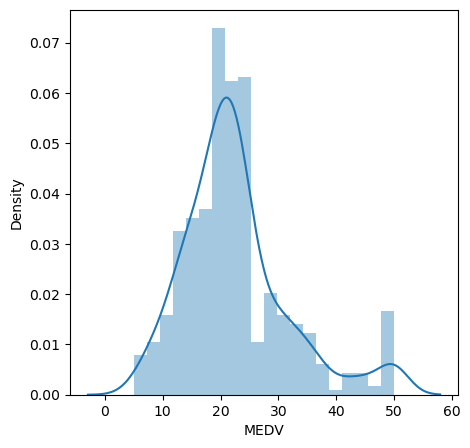

In [30]:
# Let's see the distribution of data
for i in data.columns:
    plt.figure(figsize=(5, 5))
    print(f"skewness of {i} is {data[i].skew()}")
    sns.distplot(data[i], bins=20)

In [13]:
# Independent and dependent columns in dataset 
X = data.iloc[:, :-1]    # Independent features of dataset
Y = data.iloc[:, -1]     # Dependent Features of dataset

In [24]:
# lets see the number of unique values in the input data 
for i in X.columns:
    print(f"Number of uique feature in {i} : {X[i].nunique()}")

Number of uique feature in CRIM : 504
Number of uique feature in ZN : 26
Number of uique feature in INDUS : 76
Number of uique feature in CHAS : 2
Number of uique feature in NOX : 81
Number of uique feature in RM : 446
Number of uique feature in AGE : 356
Number of uique feature in DIS : 412
Number of uique feature in RAD : 9
Number of uique feature in TAX : 66
Number of uique feature in PTRATIO : 46
Number of uique feature in B : 357
Number of uique feature in LSTAT : 455


Here CHAS and RAD having very less number of features . lets explore these dataset

In [26]:
# from this it's look like a categorical variable 
X["CHAS"].unique()

array([0, 1], dtype=int64)

In [27]:
# from this it also look like a categorical variable 
X["RAD"].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

<AxesSubplot:>

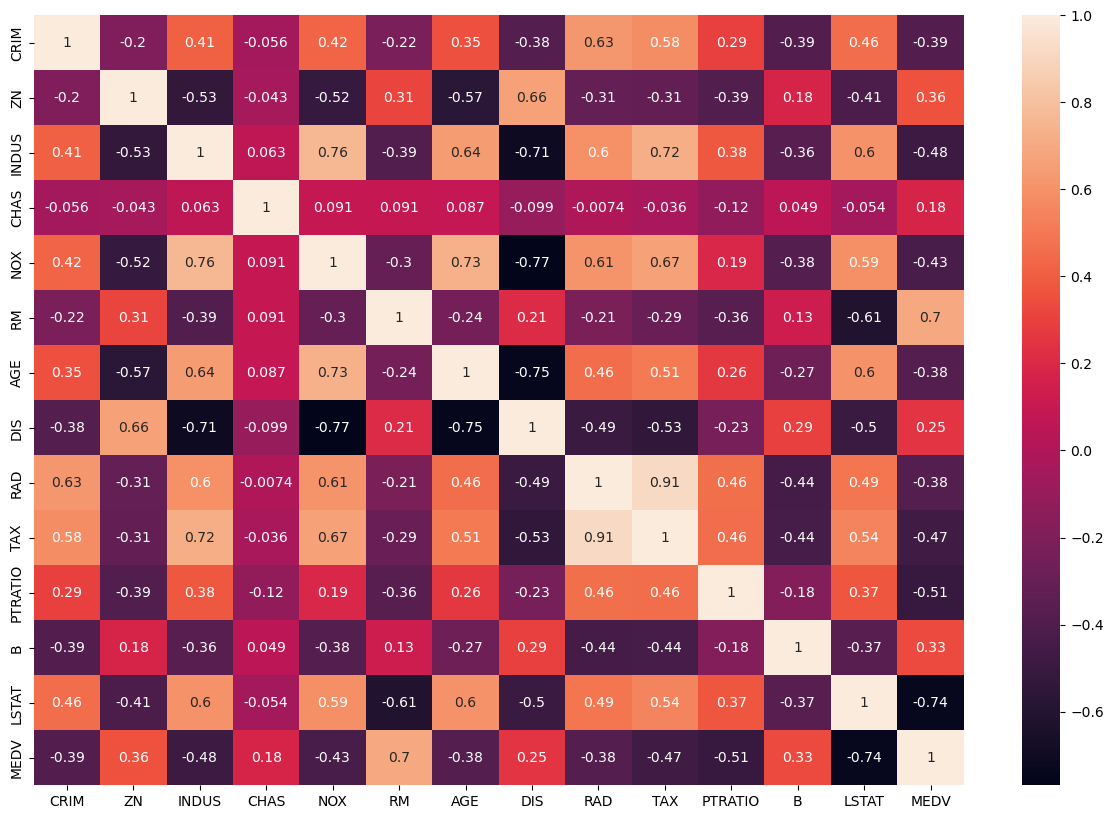

In [31]:
# lets plot the correlation map of each variable 
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

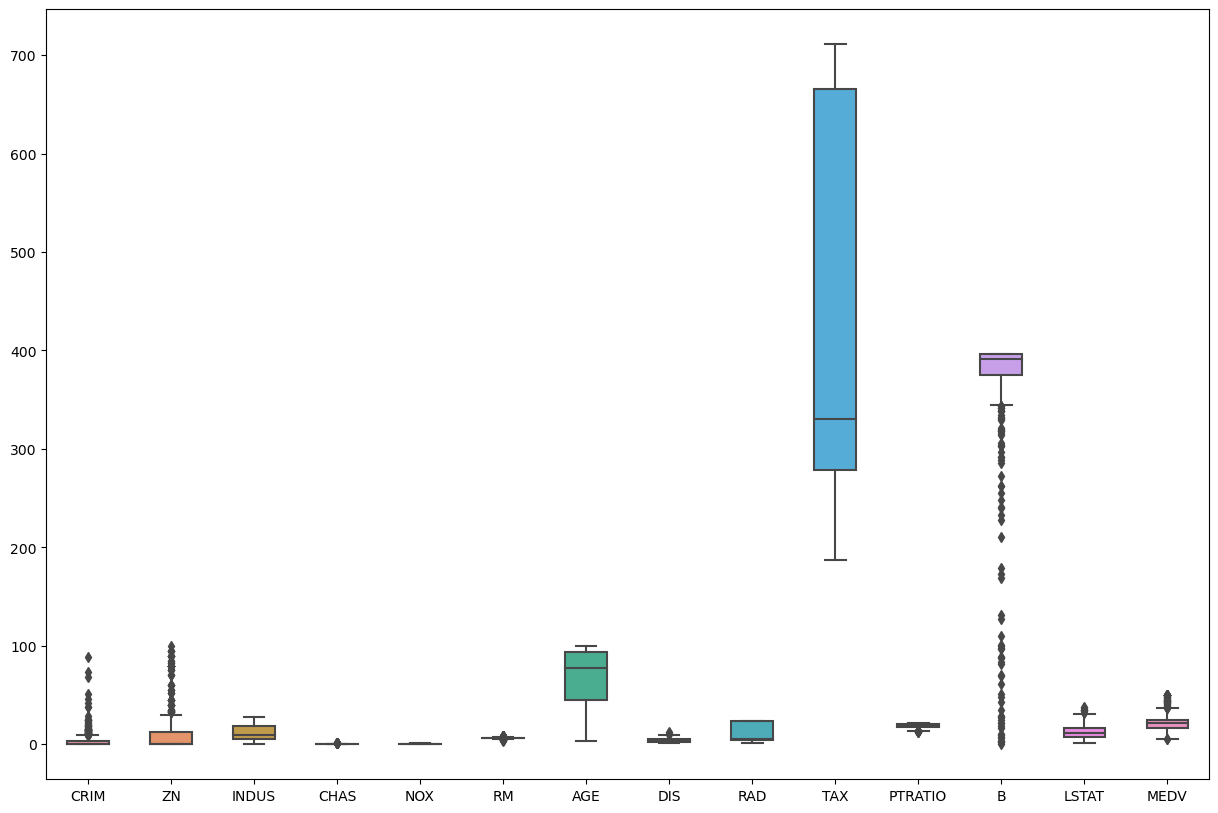

In [35]:
# Lets plot the boxplot of all feature to show the range of dataset
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=data, width=0.5, ax=ax)

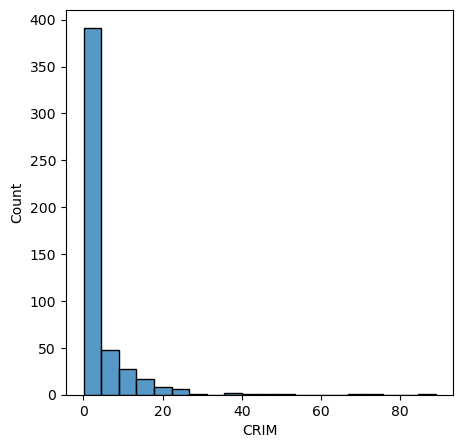

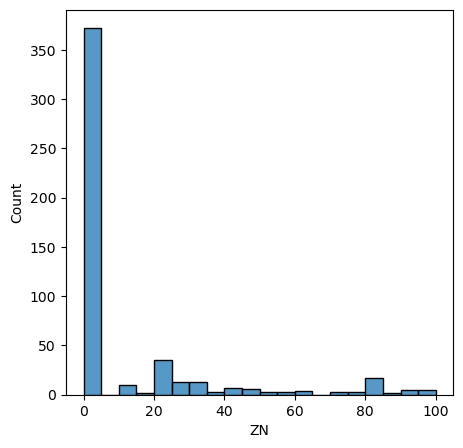

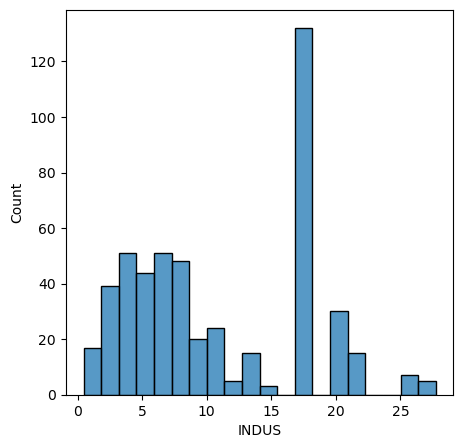

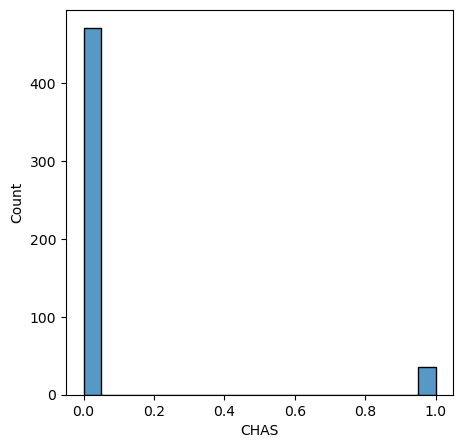

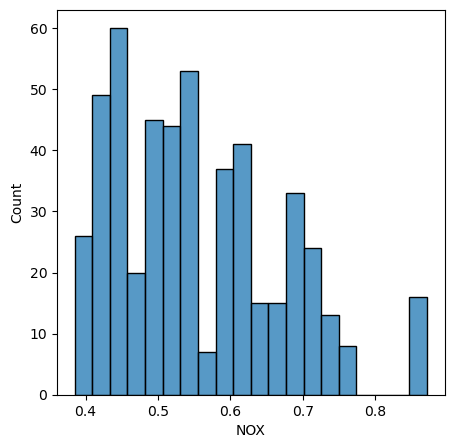

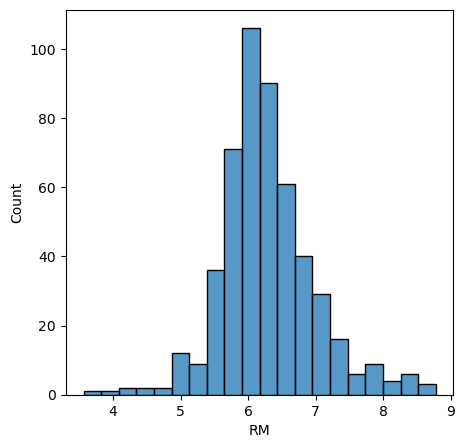

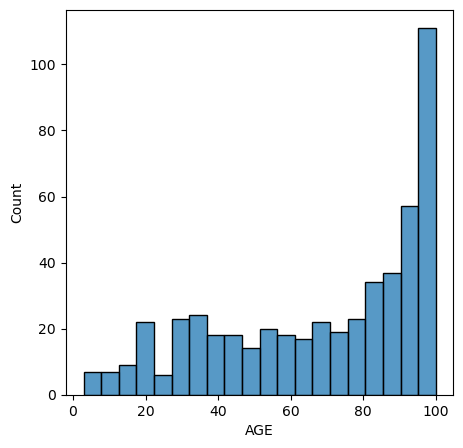

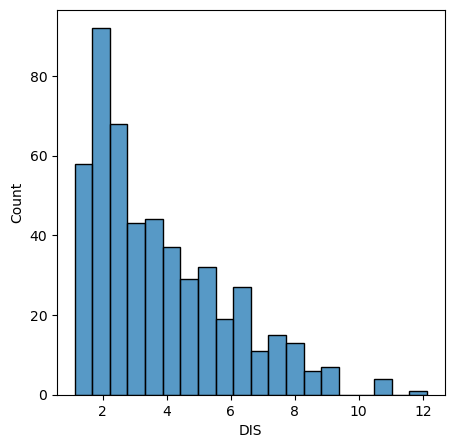

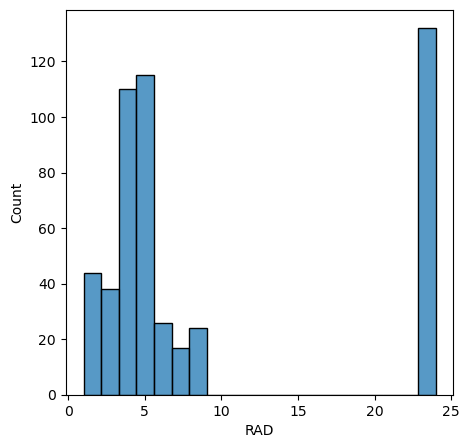

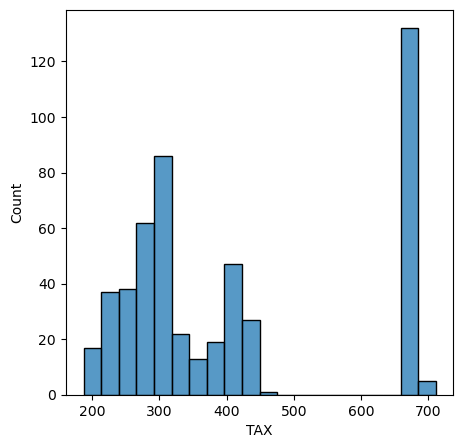

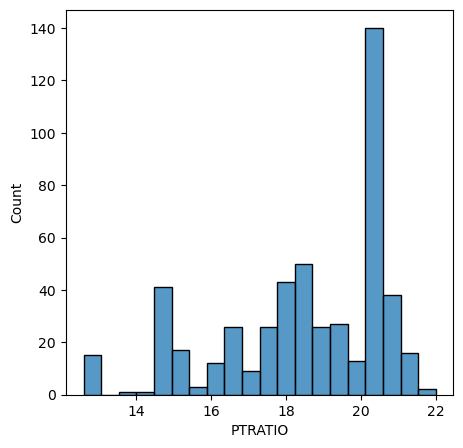

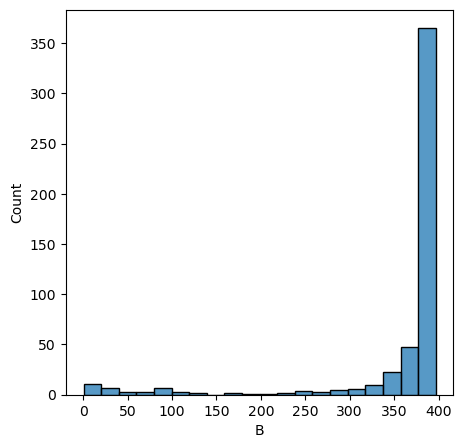

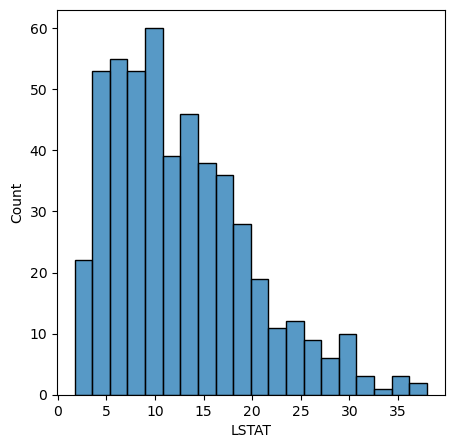

In [41]:
# Let's see the distribution of data
for i in X.columns:
    plt.figure(figsize=(5,5))
    sns.histplot(X[i], bins=20)